In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [3]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

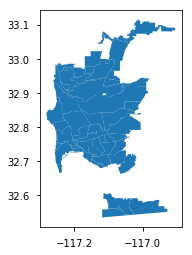

In [49]:
comm = pkg.reference('communities').geoframe()
comm = comm[comm['type'] == 'sd_community']

tracts = pkg.reference('tracts').geoframe().set_index('geoid')

comm.crs = {'init': 'epsg:4269'}
comm.plot()

In [42]:
ab = pkg.reference('active_businesses').dataframe()
ab.head().T


,0,1,2,3,4
account_key,2017014278,2017013866,2017013873,2017013871,2017013870
address_str,10640 scripps ranch blvd,5085 september st,827 beryl st,2704 boston ave,1502 mesa brook st
apt_suite,101,NaN,NaN,NaN,NaN
bus_start_dt,2017-08-23,2015-09-01,2015-09-01,2015-09-01,2015-09-01
business_owner_name,miriam chor freitas,robert burke,robert doll,jose m espinozanaranjo & maria m dadaespinoza,feliz h blanco & idalia contreras ochoa
business_phone,(858) 217-5770,NaN,NaN,NaN,NaN
city,san diego,san diego,san diego,san diego,san diego
creation_dt,2017-09-27,2017-09-27,2017-09-27,2017-09-27,2017-09-27
doing_bus_as_name,miriam chor freitas lcsw,robert burke,robert doll,jose m espinozanaranjo & maria m dadaespinoza,feliz h blanco & idalia contreras ochoa
expiration_dt,2018-08-31,2018-08-31,2018-08-31,2018-08-31,2018-08-31


In [40]:
ab.head()

,account_key,address_str,apt_suite,bus_start_dt,business_owner_name,business_phone,city,creation_dt,doing_bus_as_name,expiration_dt,lat,lon,naics_code,naics_description,ownership_type,pmb_box,po_box,state,zip,BID
0,2017014278,10640 scripps ranch blvd,101,2017-08-23,miriam chor freitas,(858) 217-5770,san diego,2017-09-27,miriam chor freitas lcsw,2018-08-31,32.911936,-117.110321,62133,offices of other mental health practitioners,sole,NaN,NaN,CA,92131-1095,NaN
1,2017013866,5085 september st,NaN,2015-09-01,robert burke,NaN,san diego,2017-09-27,robert burke,2018-08-31,32.780080,-117.187049,541,"professional, scientific & technical services",sole,NaN,NaN,CA,92110-1222,NaN
2,2017013873,827 beryl st,NaN,2015-09-01,robert doll,NaN,san diego,2017-09-27,robert doll,2018-08-31,32.803056,-117.256734,541,"professional, scientific & technical services",sole,NaN,NaN,CA,92109-2004,NaN
3,2017013871,2704 boston ave,NaN,2015-09-01,jose m espinozanaranjo & maria m dadaespinoza,NaN,san diego,2017-09-27,jose m espinozanaranjo & maria m dadaespinoza,2018-08-31,32.694014,-117.135811,541,"professional, scientific & technical services",h-w,NaN,NaN,CA,92113-3708,NaN
4,2017013870,1502 mesa brook st,NaN,2015-09-01,feliz h blanco & idalia contreras ochoa,NaN,san diego,2017-09-27,feliz h blanco & idalia contreras ochoa,2018-08-31,32.693291,-117.048771,541,"professional, scientific & technical services",h-w,NaN,NaN,CA,92114-7875,NaN


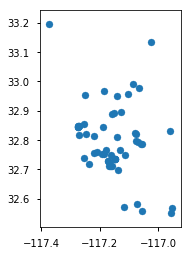

In [44]:
from shapely.geometry import Point
import geopandas as gpd

# The lat and lon tests remove businesses with HQ outside of SD 
arts = ab[(ab.naics_code == 45392) & ( ab.lon < -115) & (ab.lat < 33.4)]

artsg = gpd.GeoDataFrame(arts, geometry= [Point(x,y) for x,y in zip(arts.lon, arts.lat)] )

# Here is a quick plot
artsg.plot()

artsg.crs = comm.crs

In [21]:
## Load a Metapack data package of the US Counties, then extract San Diego county by it's FIPS code, state=6
## county=73 
counties_pkg = mp.open_package('http://library.metatab.org/census.gov-counties-2017-2.csv')

# Use the Metapack feature for turning the Pandas dataframe into a GeoPandas dataframe
counties = counties_pkg.resource('counties').geoframe()

sd_county = counties[(counties.statefp==6) & (counties.countyfp==73) ]

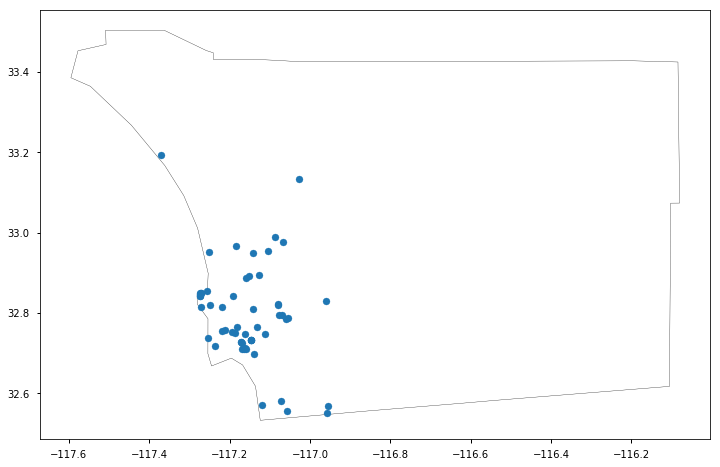

In [23]:
ax = sd_county.plot(color='white', edgecolor='black', figsize=(8*1.5,8))
artsg.plot(ax=ax)

In [50]:
cj = gpd.sjoin(artsg, comm)

In [57]:
t = cj.groupby('name').count().account_key.to_frame().sort_values('account_key', ascending=False)
t.columns = ['count']
t.head()

,count
name,
LA JOLLA,10
DOWNTOWN,7
BALBOA PARK,4
NAVAJO,4
MIRA MESA,3


In [60]:
from tabulate import tabulate
print(tabulate(t.iloc[:10], headers='keys', tablefmt='pipe'))

| name               |   count |
|:-------------------|--------:|
| LA JOLLA           |      10 |
| DOWNTOWN           |       7 |
| BALBOA PARK        |       4 |
| NAVAJO             |       4 |
| MIRA MESA          |       3 |
| RANCHO PENASQUITOS |       3 |
| CLAIREMONT MESA    |       2 |
| TIERRASANTA        |       2 |
| PENINSULA          |       2 |
| OTAY MESA          |       2 |
